In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# assigning url to a variable
url="https://raw.githubusercontent.com/Tanishqa-10/AskPython/main/Sampledata.csv"
 
# passing parameter to the function
x =pd.read_csv(url)
print(x)

      Name Last Name Member         City Code  Amount
0      Jim       Doe     No         Ohio   JD    8075
1     Gill  McGinnis    Yes        Texas   GM    9119
2      Joe    Repici    Yes       Bostan   JR    8075
3  Stephen     Tyler     No           LA   ST   91234
4    Oscar  Blankman     No          NYC   OB     298
5    Kelly       Jet     No  Desert City   KJ     123


# Problemas Comunes Presentes en el dataset:
* Valores faltantes (None en "Nombre" y "Promedio").
* Duplicados (Ana aparece dos veces).
* Outlier en "Edad" (120 años).
* Inconsistencias en "Activo" (Sí/No podría ser True/False).
* Fechas como strings (deberían ser datetime).

In [95]:
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Nombre": ["Ana", "Luis", "Carlos", "María", 

In [95]:
None

In [95]:
, "Pedro", "Ana", "Lucía", "Juan", "Sofía"],
    "Edad": [20, 22, 19, 21, 23, 120, 20, 22, 19, 21],  # Outlier en edad (120)
    "Carrera": ["Ingeniería", "Medicina", "Derecho", "Arquitectura", "Economía", "Arte", "Ingeniería", "Psicología", "Derecho", "Arte"],
    "Promedio": [8.5, 9.1, 7.8, 8.9, None, 6.5, 8.5, 9.2, 7.8, 7.0],  # Valor faltante
    "Fecha_Ingreso": ["2020-01-15", "2019-08-20", "2021-03-10", "2020-05-12", "2021-11-05", "2019-07-22", "2020-01-15", "2021-02-28", "2020-09-17", "2019-06-10"],
    "Activo": ["Sí", "No", "Sí", "Sí", "No", "Sí", "Sí", "No", "Sí", "No"]
}

df = pd.DataFrame(data)
print("Dataset Original:")
print(df)

Dataset Original:
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15     Sí
1   2    Luis    22      Medicina       9.1    2019-08-20     No
2   3  Carlos    19       Derecho       7.8    2021-03-10     Sí
3   4   María    21  Arquitectura       8.9    2020-05-12     Sí
4   5    None    23      Economía       NaN    2021-11-05     No
5   6   Pedro   120          Arte       6.5    2019-07-22     Sí
6   7     Ana    20    Ingeniería       8.5    2020-01-15     Sí
7   8   Lucía    22    Psicología       9.2    2021-02-28     No
8   9    Juan    19       Derecho       7.8    2020-09-17     Sí
9  10   Sofía    21          Arte       7.0    2019-06-10     No


# PROBLEMAS IDENTIFICADOS
## Valores Faltantes

In [96]:
#Identify rows with NaN 
valuesrows_with_nan = df[df.isnull().any(axis=1)] 
valuesrows_with_nan 
#View the rows with NaN valuesprint(rows_with_nan)

ID Nombre  Edad   Carrera  Promedio Fecha_Ingreso Activo
4   5   None    23  Economía       NaN    2021-11-05     No

In [97]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
ID               0
Nombre           1
Edad             0
Carrera          0
Promedio         1
Fecha_Ingreso    0
Activo           0
dtype: int64


# Duplicados

In [98]:
print("\nFilas duplicadas:")
print(df.duplicated().sum())  # Verifica duplicados exactos
print("\nDuplicados en columna 'Nombre':")
print(df[df.duplicated(subset=["Nombre"], keep=False)])  # Muestra duplicados en "Nombre"


Filas duplicadas:
0

Duplicados en columna 'Nombre':
   ID Nombre  Edad     Carrera  Promedio Fecha_Ingreso Activo
0   1    Ana    20  Ingeniería       8.5    2020-01-15     Sí
6   7    Ana    20  Ingeniería       8.5    2020-01-15     Sí


# Outliers

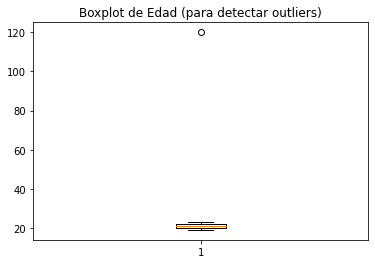

In [75]:
plt.boxplot(df["Edad"].dropna())
plt.title("Boxplot de Edad (para detectar outliers)")
plt.show()

# LIMPIEZA DE DATOS
## Valores Faltantes

In [99]:
# Eliminar filas con "Nombre" faltante (si es clave)
df = df.dropna(subset=["Nombre"])

print("\nDataset después de manejar duplicados:")
print(df)


Dataset después de manejar duplicados:
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15     Sí
1   2    Luis    22      Medicina       9.1    2019-08-20     No
2   3  Carlos    19       Derecho       7.8    2021-03-10     Sí
3   4   María    21  Arquitectura       8.9    2020-05-12     Sí
5   6   Pedro   120          Arte       6.5    2019-07-22     Sí
6   7     Ana    20    Ingeniería       8.5    2020-01-15     Sí
7   8   Lucía    22    Psicología       9.2    2021-02-28     No
8   9    Juan    19       Derecho       7.8    2020-09-17     Sí
9  10   Sofía    21          Arte       7.0    2019-06-10     No


In [100]:
# Imputar promedio faltante con la mediana
mediana_promedio = df["Promedio"].median()
df["Promedio"] = df["Promedio"].fillna(mediana_promedio)

print("\nDataset después de manejar faltantes:")
print(df)


Dataset después de manejar faltantes:
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15     Sí
1   2    Luis    22      Medicina       9.1    2019-08-20     No
2   3  Carlos    19       Derecho       7.8    2021-03-10     Sí
3   4   María    21  Arquitectura       8.9    2020-05-12     Sí
5   6   Pedro   120          Arte       6.5    2019-07-22     Sí
6   7     Ana    20    Ingeniería       8.5    2020-01-15     Sí
7   8   Lucía    22    Psicología       9.2    2021-02-28     No
8   9    Juan    19       Derecho       7.8    2020-09-17     Sí
9  10   Sofía    21          Arte       7.0    2019-06-10     No


## Eliminar Duplicados

In [101]:
df = df.drop_duplicates(subset=["Nombre"], keep="first")  # Conserva la primera aparición
print("\nDataset sin duplicados en 'Nombre':")
print(df)


Dataset sin duplicados en 'Nombre':
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15     Sí
1   2    Luis    22      Medicina       9.1    2019-08-20     No
2   3  Carlos    19       Derecho       7.8    2021-03-10     Sí
3   4   María    21  Arquitectura       8.9    2020-05-12     Sí
5   6   Pedro   120          Arte       6.5    2019-07-22     Sí
7   8   Lucía    22    Psicología       9.2    2021-02-28     No
8   9    Juan    19       Derecho       7.8    2020-09-17     Sí
9  10   Sofía    21          Arte       7.0    2019-06-10     No


# Corregir Outliers

In [102]:
# Reemplazar edad incorrecta (120) con la mediana
mediana_edad = df["Edad"].median()
df.loc[df["Edad"] > 100, "Edad"] = mediana_edad

print("\nDataset después de corregir outliers:")
print(df)


Dataset después de corregir outliers:
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15     Sí
1   2    Luis    22      Medicina       9.1    2019-08-20     No
2   3  Carlos    19       Derecho       7.8    2021-03-10     Sí
3   4   María    21  Arquitectura       8.9    2020-05-12     Sí
5   6   Pedro    21          Arte       6.5    2019-07-22     Sí
7   8   Lucía    22    Psicología       9.2    2021-02-28     No
8   9    Juan    19       Derecho       7.8    2020-09-17     Sí
9  10   Sofía    21          Arte       7.0    2019-06-10     No


# Estandarizar Formatos

In [103]:
# Convertir "Activo" a booleano
df["Activo"] = df["Activo"].map({"Sí": True, "No": False})

# Convertir "Fecha_Ingreso" a datetime
df["Fecha_Ingreso"] = pd.to_datetime(df["Fecha_Ingreso"])

print("\nDataset con formatos corregidos:")
print(df)


Dataset con formatos corregidos:
   ID  Nombre  Edad       Carrera  Promedio Fecha_Ingreso  Activo
0   1     Ana    20    Ingeniería       8.5    2020-01-15    True
1   2    Luis    22      Medicina       9.1    2019-08-20   False
2   3  Carlos    19       Derecho       7.8    2021-03-10    True
3   4   María    21  Arquitectura       8.9    2020-05-12    True
5   6   Pedro    21          Arte       6.5    2019-07-22    True
7   8   Lucía    22    Psicología       9.2    2021-02-28   False
8   9    Juan    19       Derecho       7.8    2020-09-17    True
9  10   Sofía    21          Arte       7.0    2019-06-10   False


# VALIDACION FINAL
## Verificación de Datos Limpios

In [104]:
print("\nResumen final del dataset limpio:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())


Resumen final del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             8 non-null      int64         
 1   Nombre         8 non-null      object        
 2   Edad           8 non-null      int64         
 3   Carrera        8 non-null      object        
 4   Promedio       8 non-null      float64       
 5   Fecha_Ingreso  8 non-null      datetime64[ns]
 6   Activo         8 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 456.0+ bytes
None

Estadísticas descriptivas:
              ID       Edad  Promedio
count   8.000000   8.000000  8.000000
mean    5.375000  20.625000  8.100000
std     3.377975   1.187735  0.997139
min     1.000000  19.000000  6.500000
25%     2.750000  19.750000  7.600000
50%     5.000000  21.000000  8.150000
75%     8.25

In [81]:
#df.to_csv("estudiantes_limpio.csv", index=False)
#print("¡Dataset exportado correctamente!")